In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Uniform Sequence, CP-SAT, Multi-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'uniform.cp_sat.multi_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1500 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_275,8193,3,0,62,873,5,3.407371,0.086395,0.442659,4,True,10.808049,10.049392,10.943513,10.079893,9
1,BARN,instance_033,1337,2,0,52,572,4,3.015099,0.045936,0.410486,3,True,10.271916,10.064498,10.295857,10.057045,7
2,BARN,instance_202,1337,1,1,62,732,5,5.354488,0.082383,0.319358,4,True,10.570981,10.571868,10.585315,10.595412,8
3,BARN,instance_285,42,5,0,82,1063,7,4.384954,0.168839,0.867820,6,True,10.529483,10.312736,10.551259,10.248067,8
4,BARN,instance_295,1337,1,0,52,607,4,3.294885,0.044882,0.269909,3,True,10.374396,10.145246,10.556507,10.269432,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,BARN,instance_071,567,1,2,62,937,5,4.303129,0.095621,0.215837,4,True,11.820269,9.961528,12.291689,9.890719,7
1496,BARN,instance_069,567,2,0,92,1260,8,4.329028,0.152319,0.330992,7,True,10.595837,10.475903,10.717623,10.480433,9
1497,BARN,instance_214,42,0,1,42,441,3,5.059680,0.024129,0.314875,2,True,10.448158,10.448158,10.499887,10.499887,6
1498,BARN,instance_191,8193,1,0,42,442,3,5.941921,0.030874,0.143492,2,True,10.808049,10.812450,10.943513,10.855938,6


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_275,8193,3,0,62,873,5,3.407371,0.086395,0.442659,4,True,10.808049,10.049392,10.943513,10.079893,9
1,BARN,instance_033,1337,2,0,52,572,4,3.015099,0.045936,0.410486,3,True,10.271916,10.064498,10.295857,10.057045,7
2,BARN,instance_202,1337,1,1,62,732,5,5.354488,0.082383,0.319358,4,True,10.570981,10.571868,10.585315,10.595412,8
3,BARN,instance_285,42,5,0,82,1063,7,4.384954,0.168839,0.867820,6,True,10.529483,10.312736,10.551259,10.248067,8
4,BARN,instance_295,1337,1,0,52,607,4,3.294885,0.044882,0.269909,3,True,10.374396,10.145246,10.556507,10.269432,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,BARN,instance_275,1,1,4,72,1369,6,3.952575,0.139059,0.243373,5,True,10.190419,10.187581,10.404902,10.198082,7
1495,BARN,instance_071,567,1,2,62,937,5,4.303129,0.095621,0.215837,4,True,11.820269,9.961528,12.291689,9.890719,7
1496,BARN,instance_069,567,2,0,92,1260,8,4.329028,0.152319,0.330992,7,True,10.595837,10.475903,10.717623,10.480433,9
1497,BARN,instance_214,42,0,1,42,441,3,5.059680,0.024129,0.314875,2,True,10.448158,10.448158,10.499887,10.499887,6


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
6,BARN,instance_212,1337,0,0,32,338,2,3.814125,0.010884,0.125465,1,True,10.271916,10.271916,10.295857,10.295857,6
7,BARN,instance_089,567,0,0,32,298,2,4.579120,0.010682,0.123586,1,True,12.470616,12.470616,12.731729,12.731729,6
8,BARN,instance_017,567,0,0,32,267,2,4.579120,0.010366,0.107004,1,True,11.671497,11.671497,11.798282,11.798282,5
19,BARN,instance_009,1337,0,0,32,325,2,4.455439,0.014605,0.046311,1,True,9.845679,9.845679,9.866041,9.866041,5
26,BARN,instance_252,8193,0,0,32,300,2,5.842665,0.011540,0.142509,1,True,9.822156,9.822156,9.750295,9.750295,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,BARN,instance_269,42,0,0,32,214,2,7.939100,0.012311,0.349511,1,True,10.472686,10.472686,10.458010,10.458010,5
1484,BARN,instance_010,567,0,0,32,227,2,4.579120,0.008286,0.103998,1,True,11.710599,11.710599,11.951774,11.951774,6
1488,BARN,instance_201,42,0,0,32,247,2,4.498645,0.012350,0.098099,1,True,10.690495,10.690495,10.844680,10.844680,5
1493,BARN,instance_287,1,0,0,32,194,2,7.294249,0.005698,0.289844,1,True,10.161025,10.161025,10.122126,10.122126,5


In [7]:
multiple_iterations['iterations'].describe()

count    970.000000
mean       4.031959
std        2.858913
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       41.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
1362,instance_276,1,41
951,instance_099,1,22
551,instance_285,1337,20
525,instance_115,1,20
1463,instance_072,1,19
804,instance_176,1,17
1268,instance_181,42,17
1279,instance_276,1337,17
653,instance_188,1,16
1341,instance_151,42,16


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
0,instance_275,8193,5,5,62,873,3.407371
1,instance_033,1337,4,4,52,572,3.015099
2,instance_202,1337,5,5,62,732,5.354488
3,instance_285,42,7,7,82,1063,4.384954
4,instance_295,1337,4,4,52,607,3.294885
...,...,...,...,...,...,...,...
1494,instance_275,1,6,6,72,1369,3.952575
1495,instance_071,567,5,5,62,937,4.303129
1496,instance_069,567,8,8,92,1260,4.329028
1497,instance_214,42,3,3,42,441,5.059680


In [10]:
multiple_expansions['rgg_V'].describe()

count    970.000000
mean      62.319588
std       28.589131
min       42.000000
25%       42.000000
50%       52.000000
75%       72.000000
max      432.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count      970.000000
mean       945.400000
std       1313.709317
min        269.000000
25%        512.250000
50%        680.500000
75%        955.500000
max      30534.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
0,instance_275,8193,3
1,instance_033,1337,2
3,instance_285,42,5
12,instance_289,1337,2
14,instance_283,1337,8
...,...,...,...
1475,instance_209,1337,6
1479,instance_045,1,2
1489,instance_062,1337,2
1490,instance_253,567,2


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
5,instance_260,8193,2
9,instance_185,42,13
14,instance_283,1337,2
17,instance_232,8193,5
22,instance_204,42,2
...,...,...,...
1483,instance_228,567,7
1485,instance_247,1337,3
1490,instance_253,567,2
1494,instance_275,1,4


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_275,8193,0.086395,0.442659
1,instance_033,1337,0.045936,0.410486
2,instance_202,1337,0.082383,0.319358
3,instance_285,42,0.168839,0.867820
4,instance_295,1337,0.044882,0.269909
...,...,...,...,...
1495,instance_071,567,0.095621,0.215837
1496,instance_069,567,0.152319,0.330992
1497,instance_214,42,0.024129,0.314875
1498,instance_191,8193,0.030874,0.143492


In [15]:
time_data['plan_time'].describe()

count    1500.000000
mean        0.115901
std         1.185728
min         0.005597
25%         0.012687
50%         0.028350
75%         0.063395
max        44.549606
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1500.000000
mean        0.248865
std         0.224925
min         0.021981
25%         0.125176
50%         0.191796
75%         0.301392
max         2.877938
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

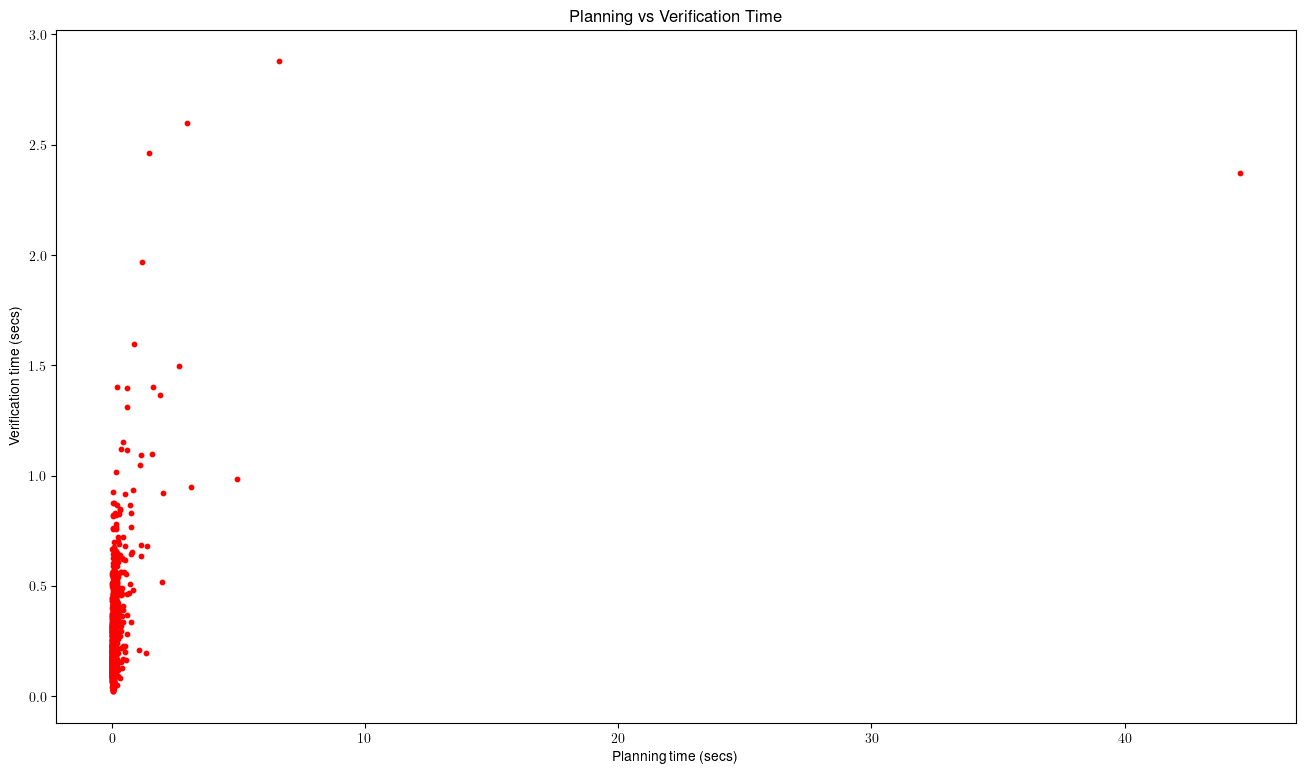

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

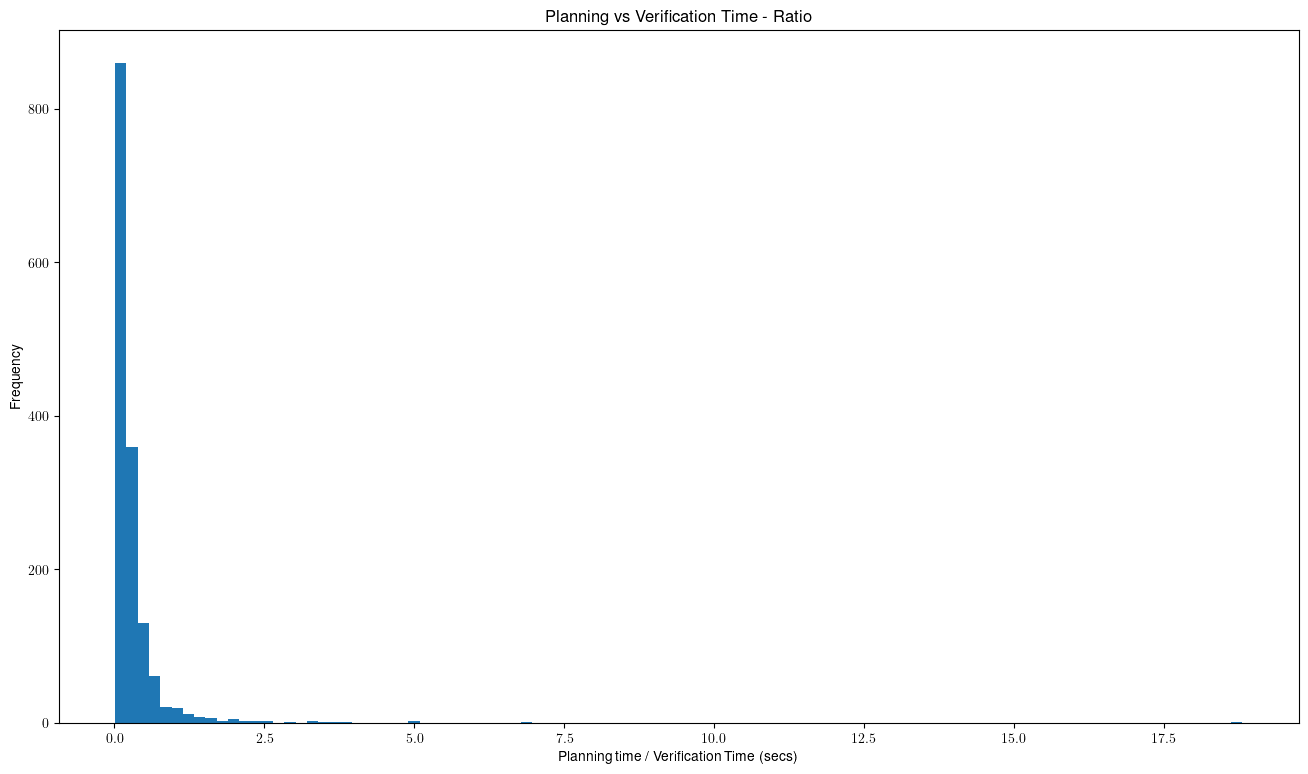

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

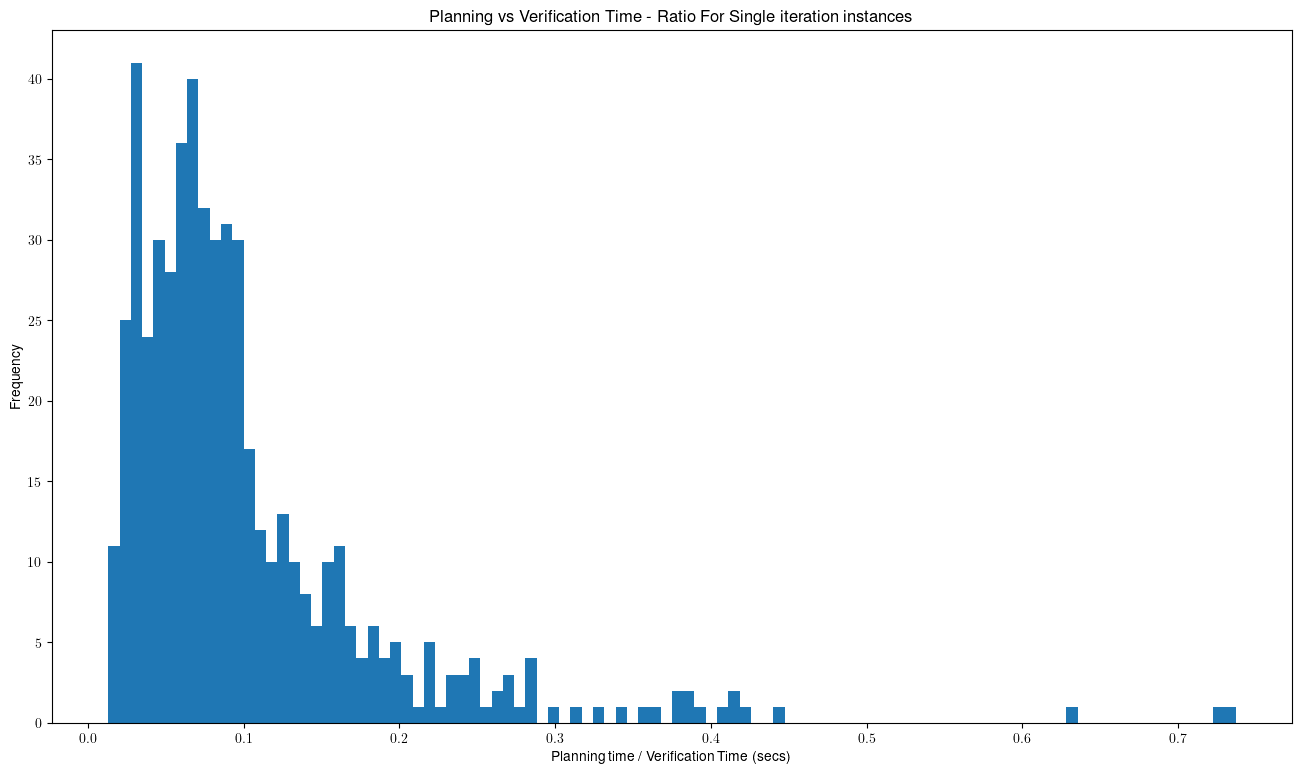

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

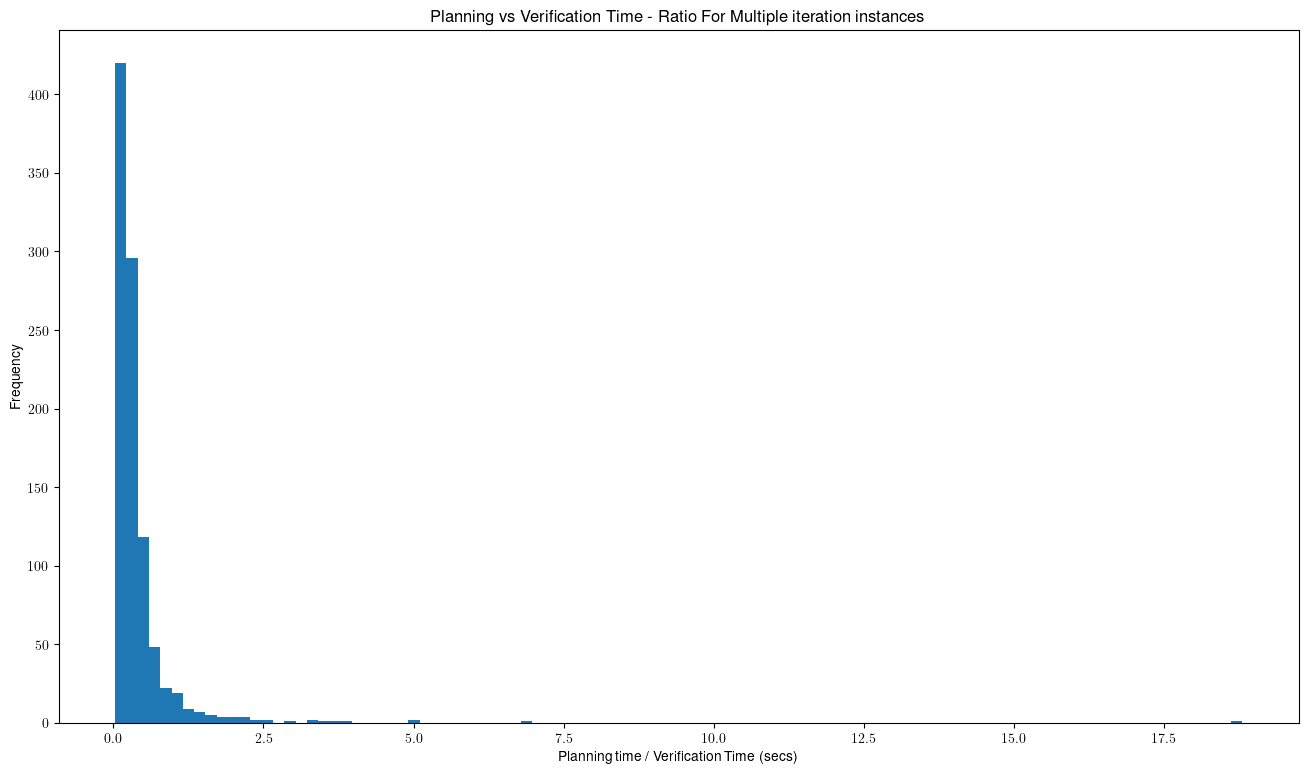

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

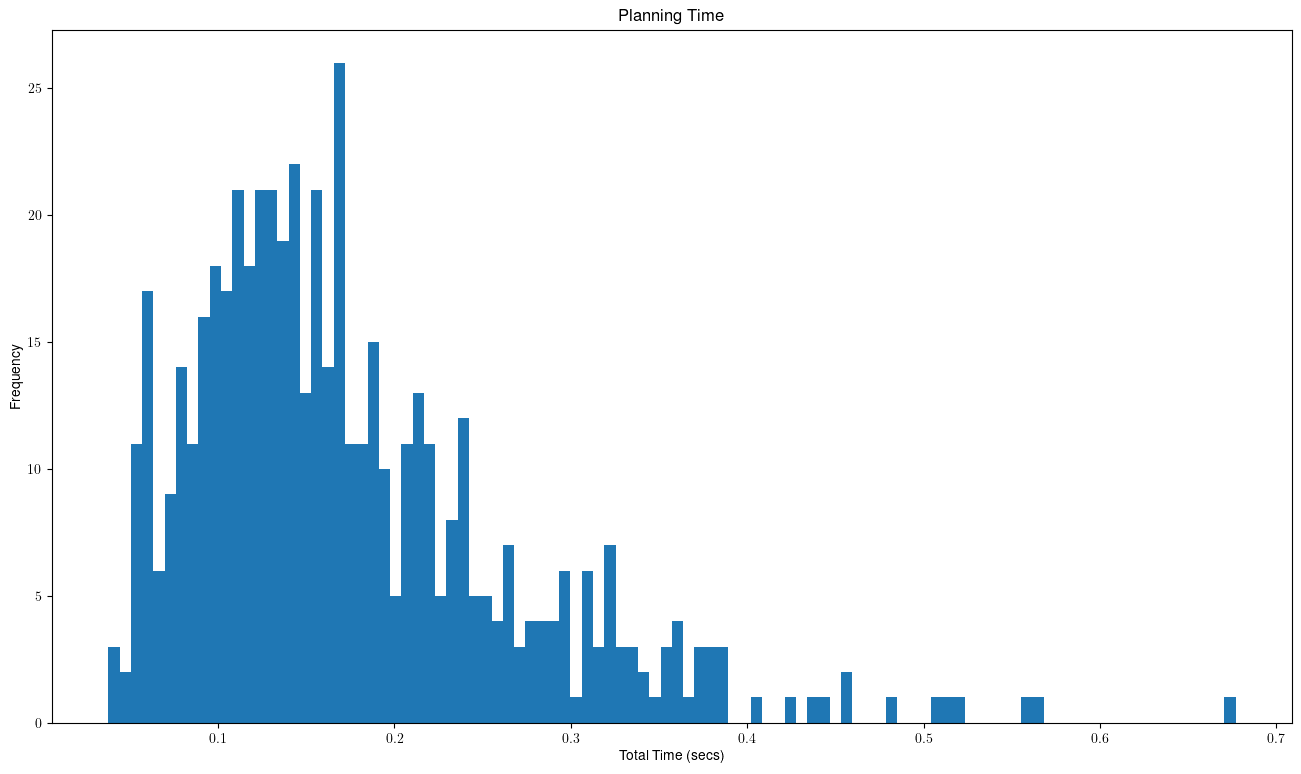

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

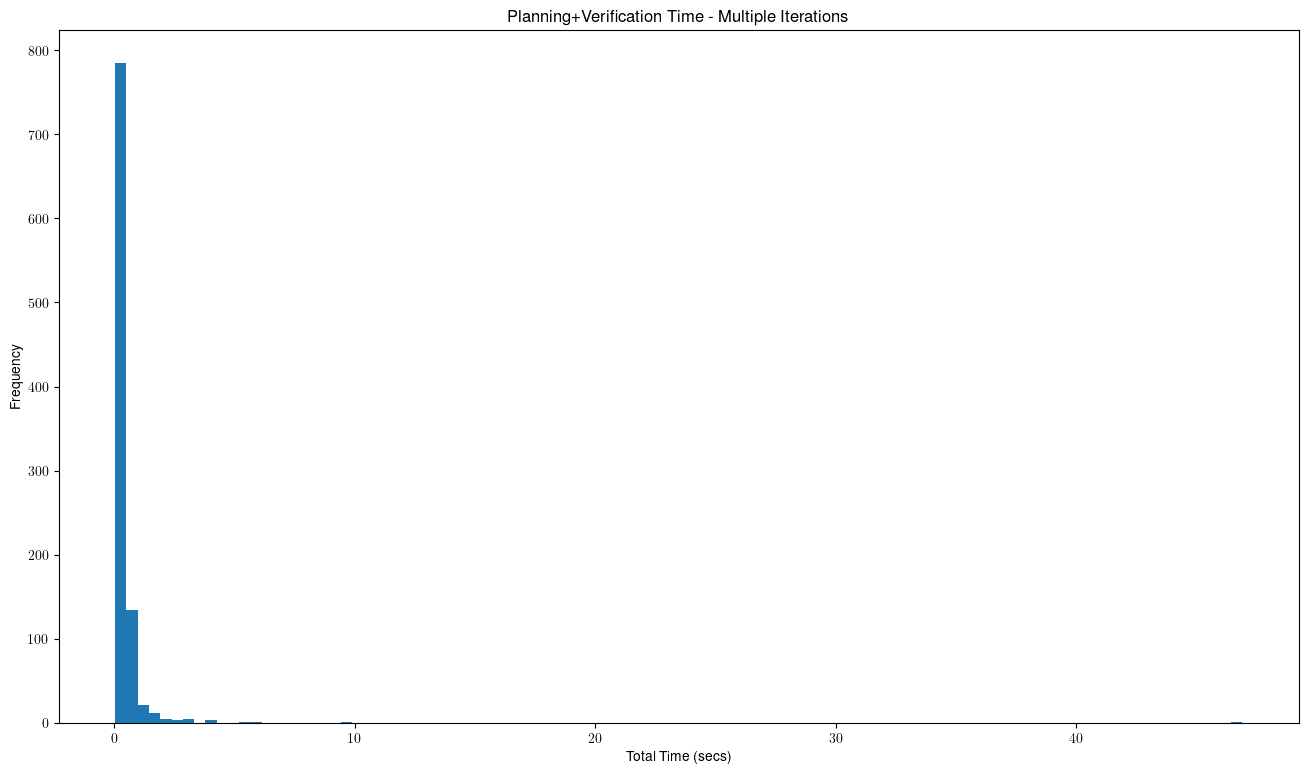

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,10.049392
1,10.064498
2,10.571868
3,10.312736
4,10.145246
...,...
1495,9.961528
1496,10.475903
1497,10.448158
1498,10.812450


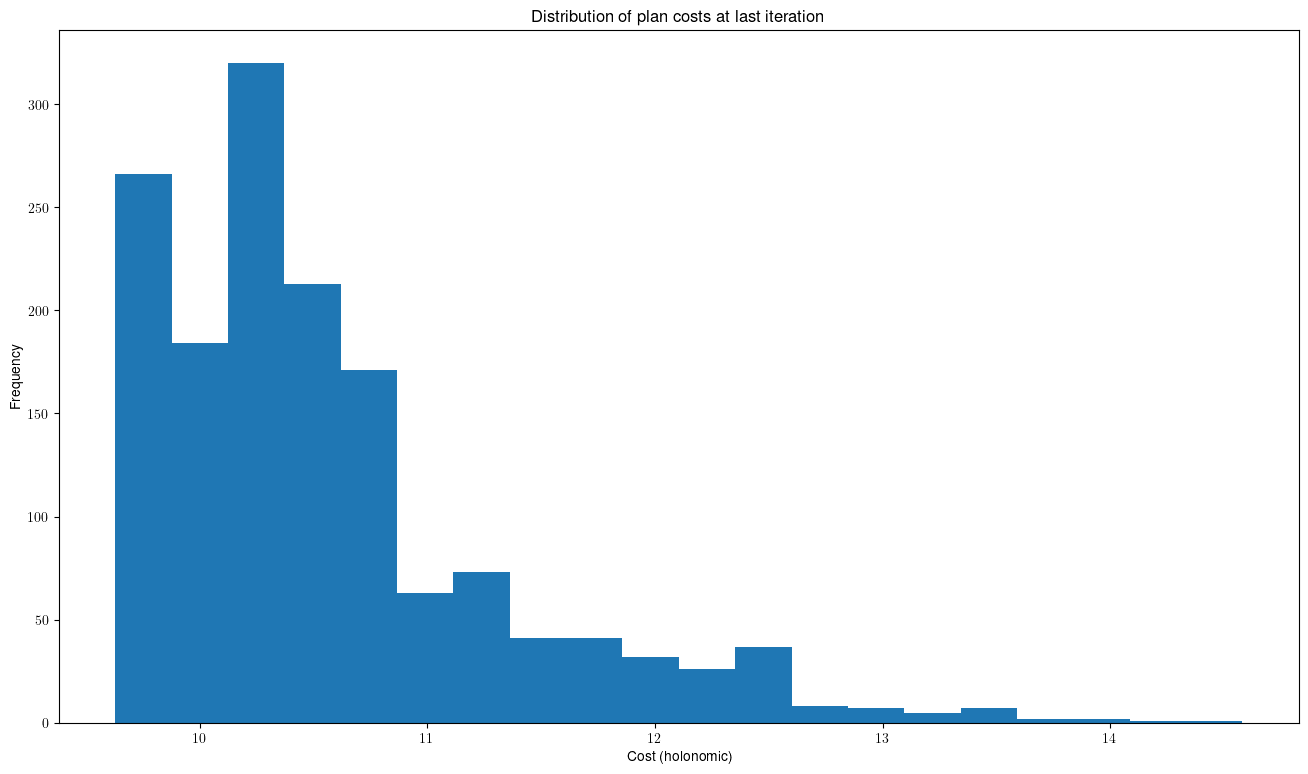

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

0      -0.758657
1      -0.207418
2       0.000887
3      -0.216748
4      -0.229151
          ...   
1494   -0.002839
1495   -1.858741
1496   -0.119934
1497    0.000000
1498    0.004401
Length: 970, dtype: float64

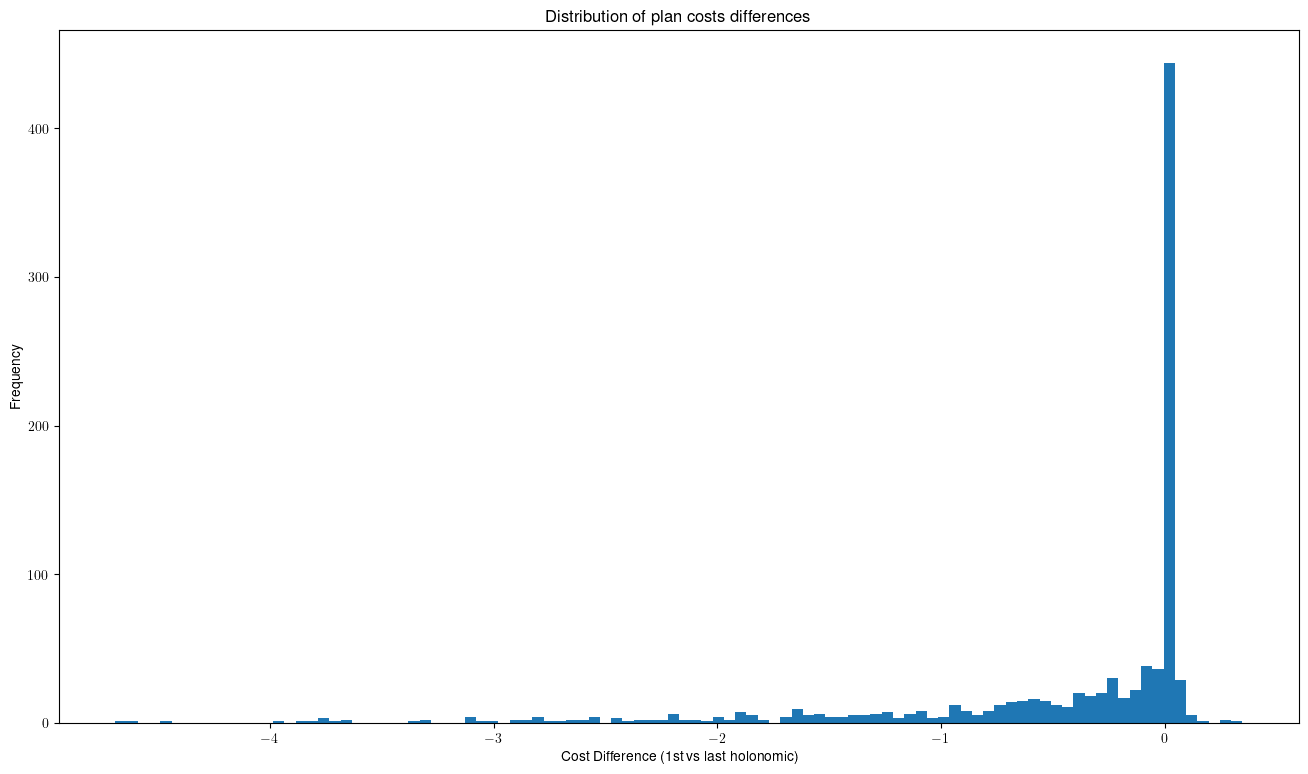

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0      -0.863620
1      -0.238812
2       0.010098
3      -0.303192
4      -0.287075
          ...   
1495   -2.400970
1496   -0.237191
1497    0.000000
1498   -0.087575
1499    0.000000
Length: 1500, dtype: float64

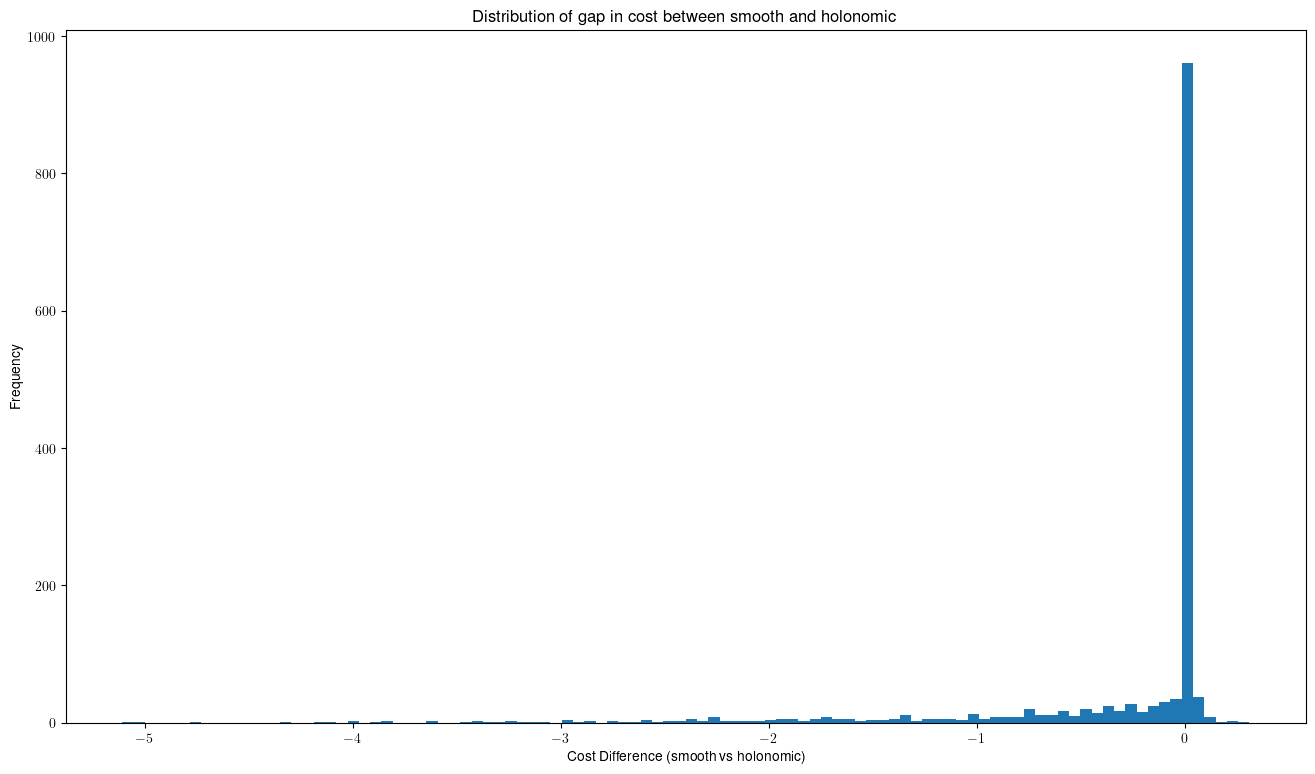

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_275,8193,0.086395,0.442659,9
1,instance_033,1337,0.045936,0.410486,7
2,instance_202,1337,0.082383,0.319358,8
3,instance_285,42,0.168839,0.867820,8
4,instance_295,1337,0.044882,0.269909,6
...,...,...,...,...,...
1495,instance_071,567,0.095621,0.215837,7
1496,instance_069,567,0.152319,0.330992,9
1497,instance_214,42,0.024129,0.314875,6
1498,instance_191,8193,0.030874,0.143492,6


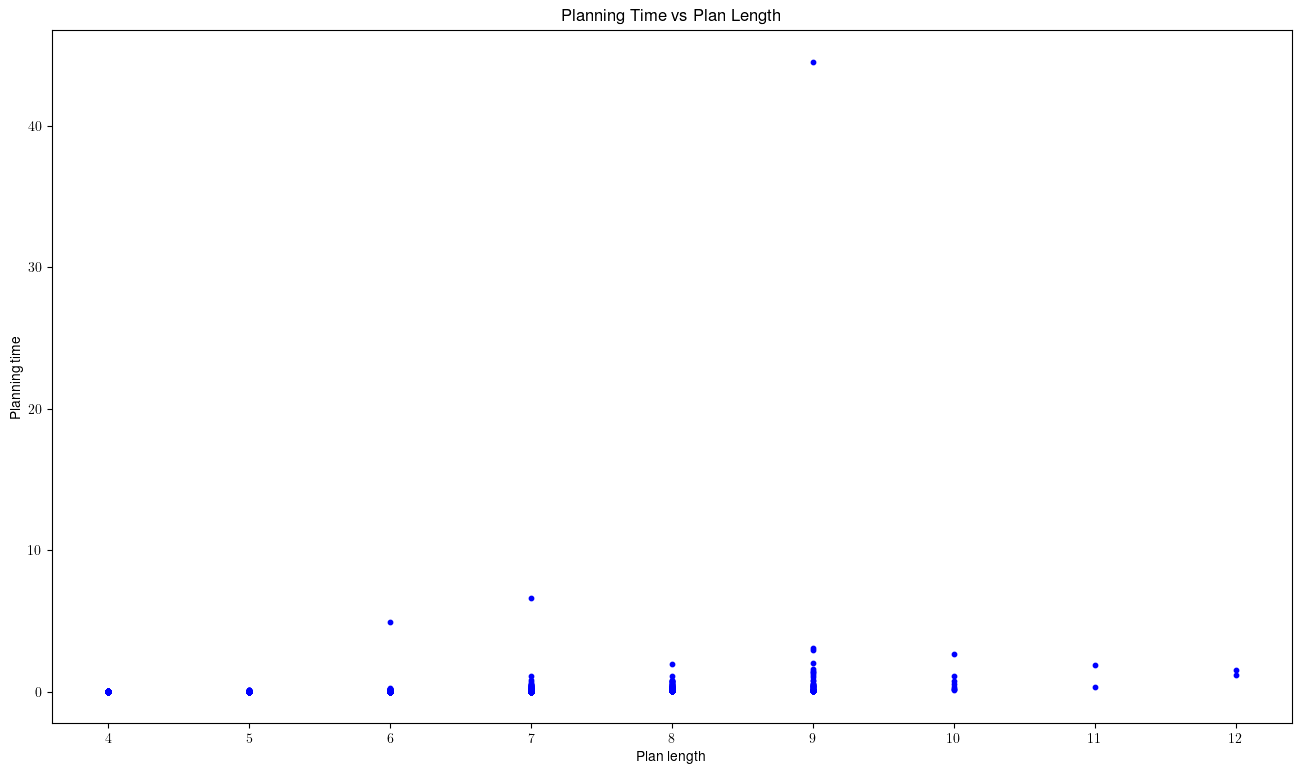

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_275,8193,0.086395,0.442659,3,0
1,instance_033,1337,0.045936,0.410486,2,0
2,instance_202,1337,0.082383,0.319358,1,1
3,instance_285,42,0.168839,0.867820,5,0
4,instance_295,1337,0.044882,0.269909,1,0
...,...,...,...,...,...,...
1495,instance_071,567,0.095621,0.215837,1,2
1496,instance_069,567,0.152319,0.330992,2,0
1497,instance_214,42,0.024129,0.314875,0,1
1498,instance_191,8193,0.030874,0.143492,1,0


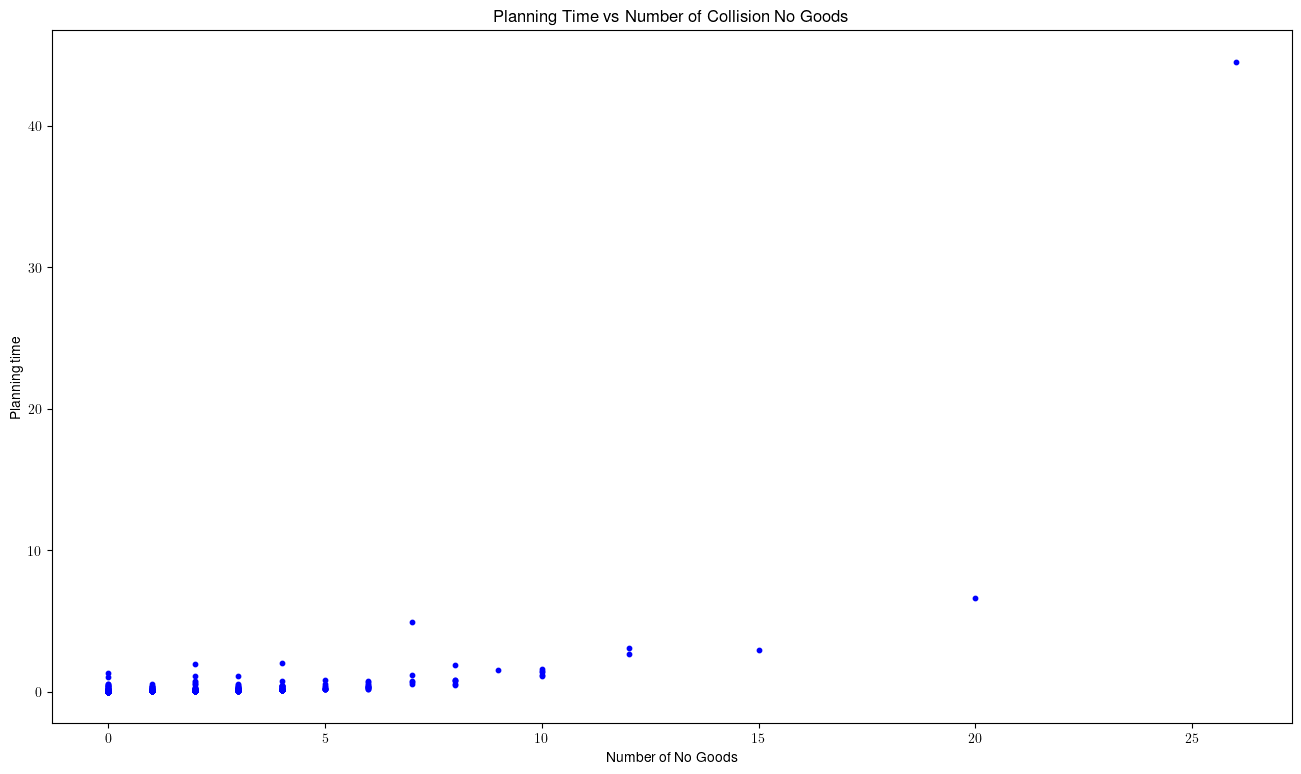

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

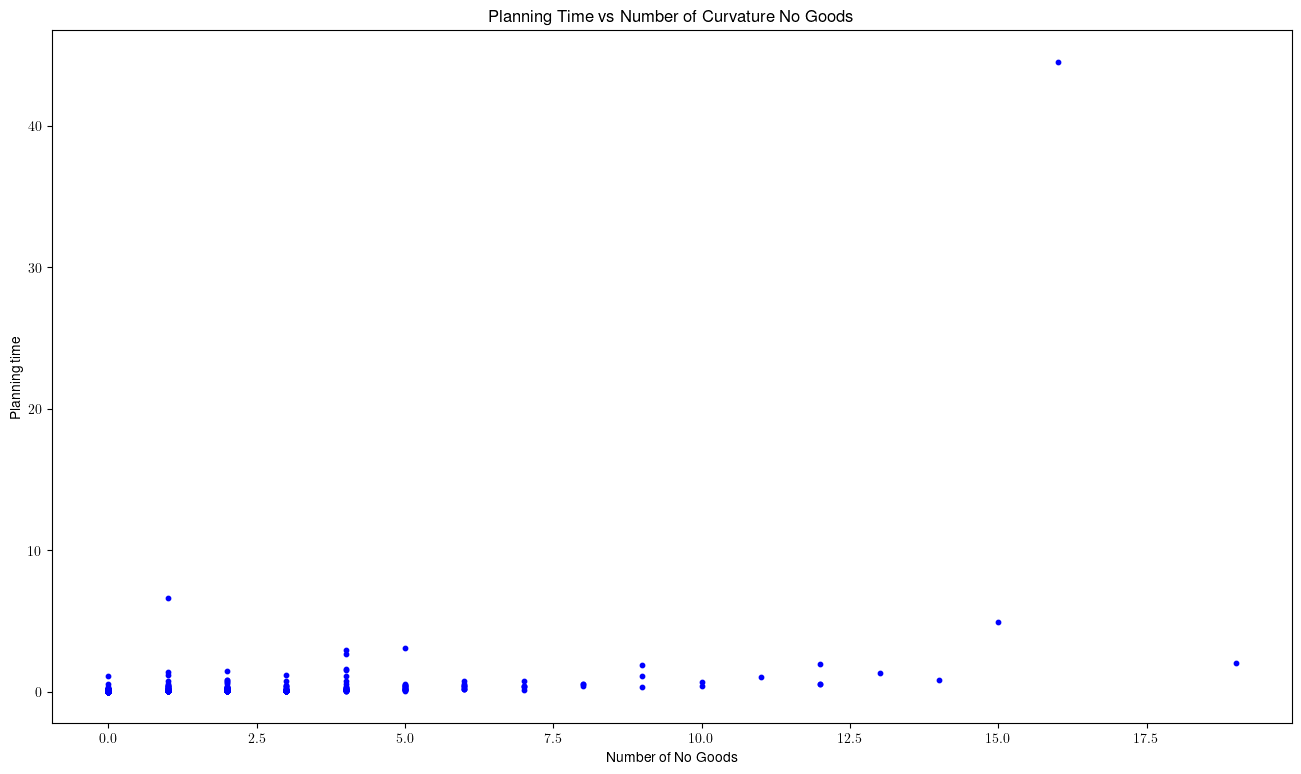

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[0, 193, 1017, 1271, 1458, 1480, 1498, 1499, 1500, 1500, 1500]


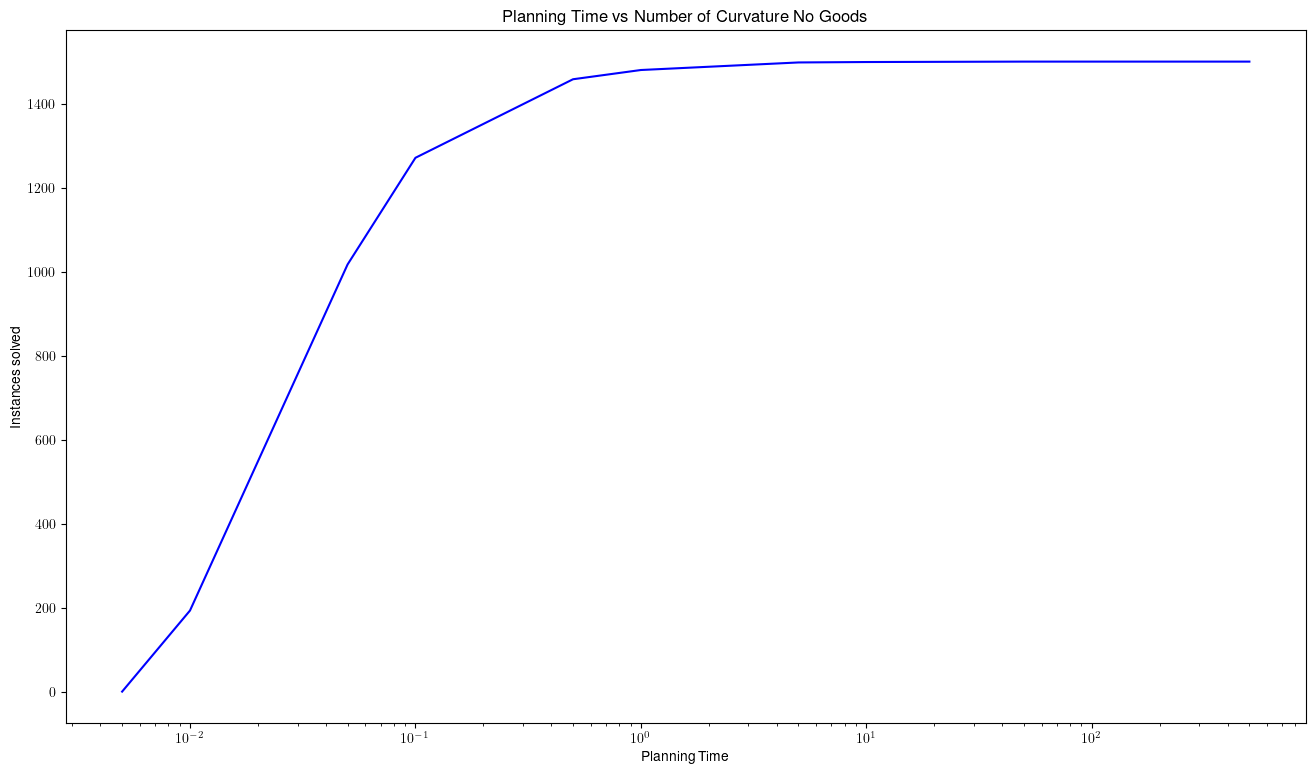

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_10630/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_275,8193,4,3,0,0.086395,0.442659,0.529054
1,instance_033,1337,3,2,0,0.045936,0.410486,0.456422
2,instance_202,1337,4,1,1,0.082383,0.319358,0.401741
3,instance_285,42,6,5,0,0.168839,0.867820,1.036659
4,instance_295,1337,3,1,0,0.044882,0.269909,0.314791
...,...,...,...,...,...,...,...,...
1495,instance_071,567,4,1,2,0.095621,0.215837,0.311458
1496,instance_069,567,7,2,0,0.152319,0.330992,0.483311
1497,instance_214,42,2,0,1,0.024129,0.314875,0.339003
1498,instance_191,8193,2,1,0,0.030874,0.143492,0.174366


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_275,8193,4,3,0,0.086395,0.442659,0.529054,1.182267,2.918721,3.741935,0.763124,1.070780
instance_033,1337,3,2,0,0.045936,0.410486,0.456422,2.456187,5.548701,5.135135,3.514968,1.438818
instance_202,1337,4,1,1,0.082383,0.319358,0.401741,2.340017,4.532848,5.290323,2.933585,1.075517
instance_285,42,6,5,0,0.168839,0.867820,1.036659,1.406491,3.161029,4.303030,1.004307,1.140626
instance_295,1337,3,1,0,0.044882,0.269909,0.314791,2.032367,4.852928,5.419355,3.475488,1.171399
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_071,567,4,1,2,0.095621,0.215837,0.311458,3.151358,8.380021,3.812500,5.796257,1.142651
instance_069,567,7,2,0,0.152319,0.330992,0.483311,1.817363,4.075164,4.457143,2.164844,1.277728
instance_214,42,2,0,1,0.024129,0.314875,0.339003,1.803355,4.611302,3.837838,2.387982,1.248638


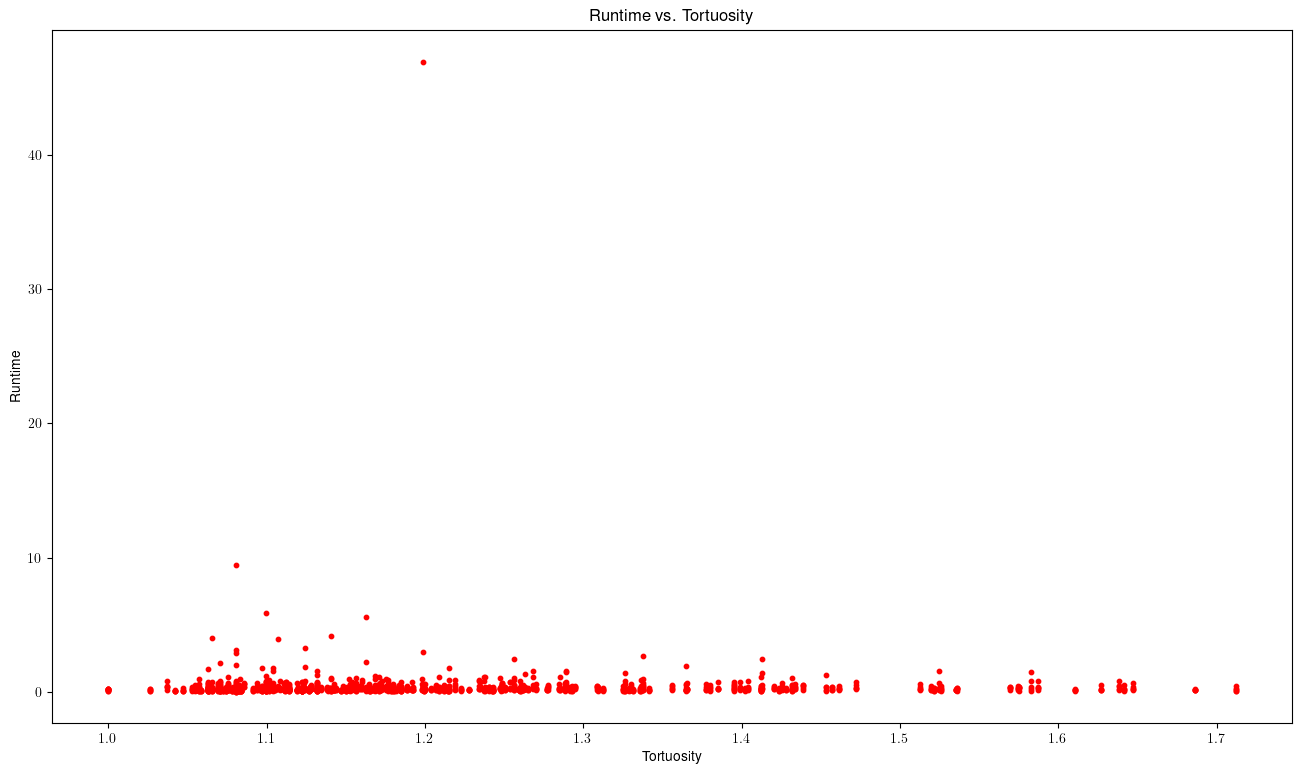

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

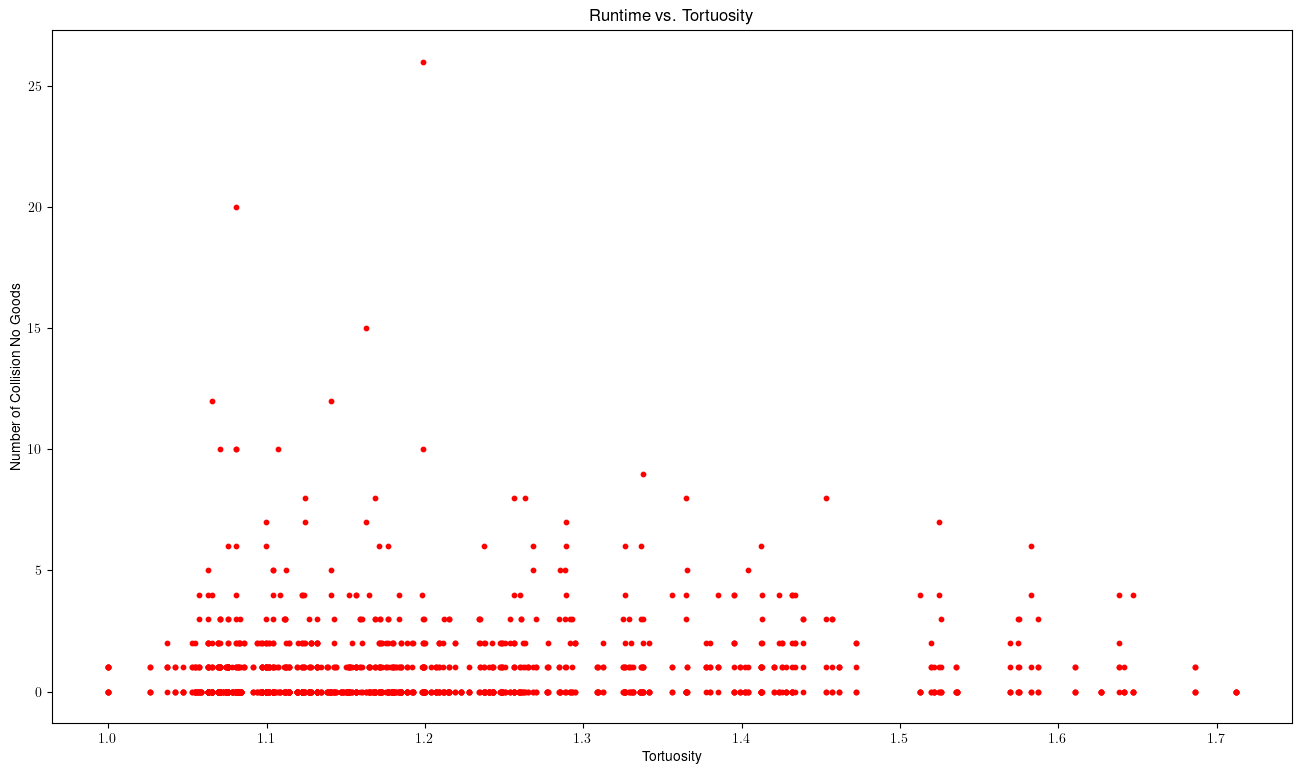

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

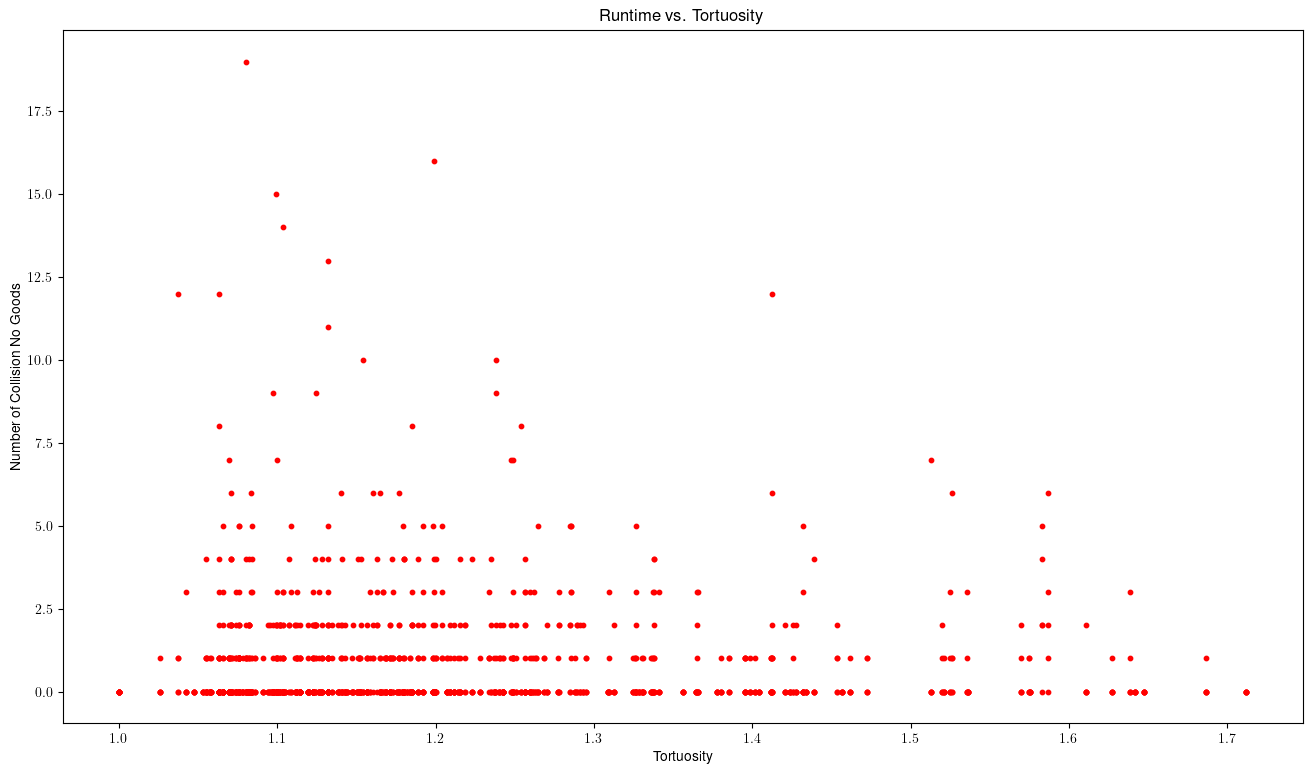

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()